In [65]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef
from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from src.preprocessing import make_dataset, recover_split
from src.utils import read_jsonl
import numpy as np
import seaborn as sns

In [17]:
DATASET_NAME = "CreativeLang/EPIC_Irony"
df = make_dataset(pd.DataFrame(load_dataset(DATASET_NAME)['train']))

In [18]:
def evaluate_split(split):
    preds = [item['pred'] for item in split]
    golds = [item['gold'] for item in split]
    outputs = classification_report(golds, preds, output_dict=True)
    outputs['mcc'] = matthews_corrcoef(golds, preds)
    return outputs

In [19]:
def evaluate_result(result):
    outputs = []
    for split in result:
        outputs.append(evaluate_split(split))
    return outputs

    

In [20]:
data = read_jsonl('results/clm_llama_nt.jsonl')
pd.DataFrame(evaluate_result(data)).stack().to_frame()
# print(classification_report(golds, preds))
# ConfusionMatrixDisplay(confusion_matrix(golds, preds)).plot()

0
0 0             {'precision': 0.7617260787992496, 'recall': 0....
  1             {'precision': 0.11764705882352941, 'recall': 0...
  accuracy                                               0.741818
  macro avg     {'precision': 0.4396865688113895, 'recall': 0....
  weighted avg  {'precision': 0.6106602722958534, 'recall': 0....
  mcc                                                   -0.049272
1 0             {'precision': 0.7633587786259542, 'recall': 0....
  1             {'precision': 0.19230769230769232, 'recall': 0...
  accuracy                                               0.736364
  macro avg     {'precision': 0.47783323546682327, 'recall': 0...
  weighted avg  {'precision': 0.6294213420167619, 'recall': 0....
  mcc                                                   -0.022205
2 0             {'precision': 0.7657142857142857, 'recall': 0....
  1             {'precision': 0.24, 'recall': 0.04651162790697...
  accuracy                                               0.741818
  macro avg     {'precision': 0.5028571428571429, 'recall': 0....
  weighted avg  {'precision': 0.6424103896103895, 'recall': 0....
  mcc                                                    0.002809
3 0             {'precision': 0.7657142857142857, 'recall': 0....
  1             {'precision': 0.24, 'recall': 0.04651162790697...
  accuracy                                               0.741818
  macro avg     {'precision': 0.5028571428571429, 'recall': 0....
  weighted avg  {'precision': 0.6424103896103895, 'recall': 0....
  mcc                                                    0.002809
4 0             {'precision': 0.7654784240150094, 'recall': 0....
  1             {'precision': 0.23529411764705882, 'recall': 0...
  accuracy                                               0.749091
  macro avg     {'precision': 0.5003862708310342, 'recall': 0....
  weighted avg  {'precision': 0.6411261048850719, 'recall': 0....
  mcc                                                    0.000316

In [21]:
data

[[{'id_original': '1534473362327863296',
   'scores': [0.6334585547447205, 0.36654147505760193],
   'gold': 1,
   'pred': 0},
  {'id_original': '1536234046648369152',
   'scores': [0.6190748810768127, 0.38092514872550964],
   'gold': 0,
   'pred': 0},
  {'id_original': '1537733534256865280',
   'scores': [0.6597772836685181, 0.34022268652915955],
   'gold': 0,
   'pred': 0},
  {'id_original': '1537738933475368961',
   'scores': [0.6758805513381958, 0.3241194486618042],
   'gold': 0,
   'pred': 0},
  {'id_original': '1537824575718932482',
   'scores': [0.630257248878479, 0.3697427809238434],
   'gold': 1,
   'pred': 0},
  {'id_original': '1537860083035553793',
   'scores': [0.6203676462173462, 0.3796323835849762],
   'gold': 0,
   'pred': 0},
  {'id_original': '1537861280551383044',
   'scores': [0.6095409393310547, 0.3904590606689453],
   'gold': 0,
   'pred': 0},
  {'id_original': '1537869693737893891',
   'scores': [0.7313354015350342, 0.26866456866264343],
   'gold': 0,
   'pred': 0

In [22]:
recover_split([item['id_original'] for item in read_jsonl('results/clm_llama_nt.jsonl')[1] if item['gold'] == 1 and item['pred'] == 1], df)

[{'source': 'twitter',
  'subreddit': None,
  'id_original': '1579732923032690688',
  'text': "@jeevanjyot20 @narendramodi Educate citizens instead of educating prime minister.  PARCIPATE &amp; bring change you wish to see. Don't seek Ministerial berth alone.",
  'parent_id_original': '1579706536410353665',
  'parent_text': "Where is BETI PARHAO BETI BACHAO @narendramodi ?\nGujarat ranking very poor  in girl child education\nOnly 10%  girls in Gujarat complete graduation\n20% per cent of girls don't reach class 10.\nGujarat  at the bottom in education of girls in the age group 10-14 years.",
  'Language_instance': 'en',
  'label': 1},
 {'source': 'twitter',
  'subreddit': None,
  'id_original': '1579751592810938370',
  'text': '@Lens_On_Eye I used to be that guy. \n\nBut ever since I got married, I don’t get those looks, but the stares 😂',
  'parent_id_original': '1579725620032196608',
  'parent_text': 'To all the girls who have eyes on only one guy are the real princess \U0001faf0🏻',


## Losses 

In [75]:
def plot_loss(states):
    best_split = np.argmax([state['best_metric'] for state in states])
    states[best_split]
    losses = []

    for i in range(0, len(states[best_split]['log_history'])-1, 2):
        losses.append((states[best_split]['log_history'][i]['loss'], 'train'))
        losses.append((states[best_split]['log_history'][i+1]['eval_loss'], 'val'))
    

    losses_df = pd.DataFrame(losses, columns=['loss', 'train_val'])

    sns.lineplot(
        data = losses_df,
        x = losses_df.index,
        y = 'loss',
        hue = 'train_val'
    )
    

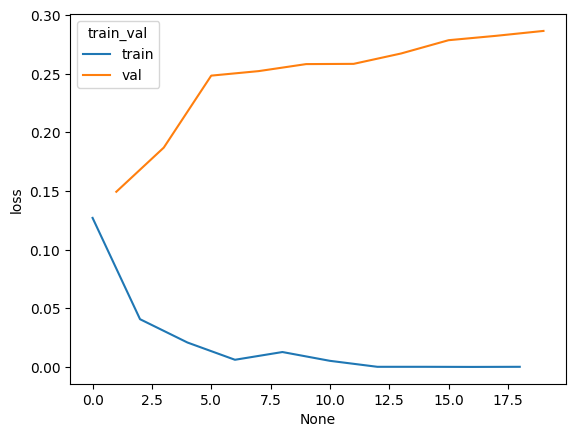

In [76]:
states = read_jsonl('results/roberta-irony-ft_loss.jsonl')
plot_loss(states)

In [70]:
losses_df

,loss,train_val
0,0.240200,train
1,0.211068,val
2,0.168400,train
3,0.209068,val
4,0.122000,train
5,0.248121,val
6,0.114200,train
7,0.225583,val
8,0.085800,train
9,0.258789,val
